<div style='text-align: right; font-weight: bold;'> March 19, 2016 </div>

<div style='text-align: right;'>Nitin Narayan | n.narayan@student.tue.nl | student no.0976544 </div>

<div style='text-align: right;'>Rodrigo Mendoza | r.a.mendoza.marin@student.tue.nl  | student no.0980103</div>

<div style="text-align: right;">Both members of the group contributed equally</div>

<h1 align="center" style="color: #0066cc">2 Evaluation Homework</h1> 

In [2]:
# Global imports and settings
from sklearn.metrics import roc_curve, auc
import numpy as np
from scipy.spatial import ConvexHull

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=4)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

<h2 style="color: #0066cc"> 2.1 Exercise 1: ROC curves </h2>


### 2.1.1 Plot A, B, and C on a ROC diagram. Use a number of different thresholds for C (at least 3).


Create the variables.

In [3]:
n_classes = 5
y_true = np.array([1,1,1,1,1,1,1,0,0,0,0,0,0])
scores_a = np.array([[1,1,0,0,1,1,0,0,1,0,0,0,0]])
scores_b = np.array([[1,1,1,1,0,1,1,0,1,0,1,0,0]])
scores_c1 = np.array([[0.8,0.9,0.7,0.6,0.4,0.8,0.4,0.4,0.6,0.4, 0.4, 0.4,0.2]])
scores_c2 = np.array([[0.8,0.9,0.7,0.6,0.4,0.8,0.4,0.4,0.6,0.4, 0.4, 0.4,0.2]])
scores_c3 = np.array([[0.8,0.9,0.7,0.6,0.4,0.8,0.4,0.4,0.6,0.4, 0.4, 0.4,0.2]])

We select the __thresholds: 0.5, 0.3 and 0.6__. Filter by thresholds and join them into one array.

In [4]:
scores_c1 = np.where(scores_c1>0.5,1,0)
scores_c2 = np.where(scores_c2>0.3,1,0)
scores_c3 = np.where(scores_c3>0.6,1,0)
scores  = np.concatenate((scores_a,scores_b,scores_c1, scores_c2, scores_c3), axis=0)

Compute ROC curve and ROC area for each prediction.

In [5]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # sklearn metrics
    fpr[i], tpr[i], _ = roc_curve(y_true, scores[i], pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])
# When the roc curve path is vertical at the the beginning 
# it doesn't return you the point (0,0)
# We add it manually for easy plotting
# FPR = 0 / 0 + 6 = 0. 
fpr[4] = np.append(0., fpr[4])
tpr[4] = np.append(0., tpr[4])

The plot gives different colors for each of the predictions. The dash black line is exactly in the middle (random classifier p = 0.5). The area under the curve is shown in the bottom right corner. Predicter C3 with a threshold of 0.6 has the highest ROC AUC value of $0.7857$. 

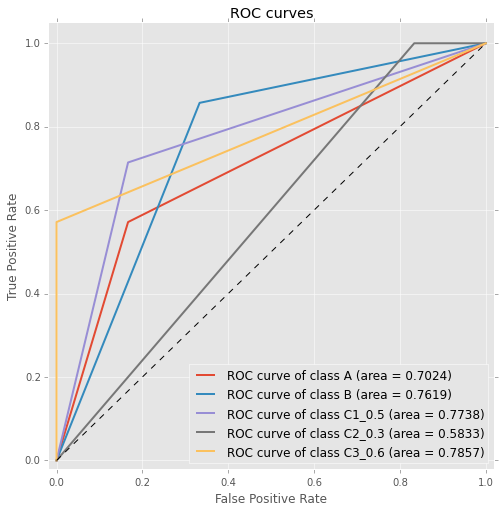

In [6]:
plt.style.use('ggplot')
names = ['A','B','C1_0.5', 'C2_0.3', 'C3_0.6']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(names[i], roc_auc[i]), linewidth=2.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plot_margin = 0.02
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + 0))
plt.show()

### 2.1.2 Assume that the classes are balanced, hence P(+) = P(-􀀀) = 0.5. The cost of a false positive and false negative are CFP = 1 and CFN = 5. Which classifier is best: A, B, or C with a threshold of 0.5? Show geometrically in the ROC diagram which models are optimal under this cost function.

First, we incorporate the missclasification costs given by $ cost = pos*(1–TPR)*C_{FN} + neg*FPR*C_{FP}$, for each of the predictions:

$$
\begin{align}
Cost_{A} &= (7)*(1-(4/7))*(5)+(6)*(1/6)*(1)  \\
&= 16 \\
Cost_{B} &= (7)*(1-6/7)*(5)+(6)*(1/3)*(1)  \\
&= 7  \\
Cost_{C_{3}} &= (7)*(1-(5/7))*(5)+(6)*(1/6)*(1)  \\
&= 11
\end{align}
$$


__Note__: to obtain TPR or FPR we can use either the points from fpr[i], tpr[i] or construct the confusion matrix and then obtain TPR and FPR with the ecuations:
$$
\begin{align}
TPR &= \frac{TP}{TP + FN}  \\
FPR &= \frac{FP}{FP + TN}
\end{align}
$$

As an example, lets look at classifier A:


<table border="0" style="width : 30%; text-align: center;">
  <tr>
    <td style="border: 1px solid white; border: 1px solid white;"></td>
    <td colspan="3" style="text-align: center; border: 1px solid white;">Predicted</td>
  </tr>
  <tr>
    <td style="border: 1px solid white;"></td>
    <td></td>
    <td style="text-align: center;">-</td>
    <td style="text-align: center;">+</td>
  </tr>
  <tr>
    <td rowspan="2" style="text-align: center; border: 1px solid white;">Actual</td>
    <td style="text-align: center;">-</td>
    <td style="text-align: center;">5</td>		
    <td style="text-align: center;">1</td>
  </tr>
  <tr>
    <td style="text-align: center;">+</td>
    <td style="text-align: center;">3</td>		
    <td style="text-align: center;">4</td>
  </tr>
</table>

$$
\begin{align}
TN &= 5 \\
FP &= 1 \\
FN &= 3\\
TP &= 4 \\
TPR_{A} &= \frac{4}{4+3} \\
&= 0.5714 \\
FPR_{A} &= \frac{1}{1+5}  \\
&= 0.1660\\
\end{align}
$$

The classifier B has the lowest cost with $6$, hence we choose B as the best one. To show geometrically which models are optimal under this cost function we need first to calculate the slope as follows:

$$
\begin{align}
slope &= \frac{neg*C_{FP}}{pos*C_{FN}} \\ 
&= \frac{(0.5)(1)}{(0.5)(5)}  \\
&= 0.20
\end{align}
$$

Now we add on the classifier space the iso-cost line with a slope of 0.20 (black line). As we see it touches B who has actually the smallest cost among all.

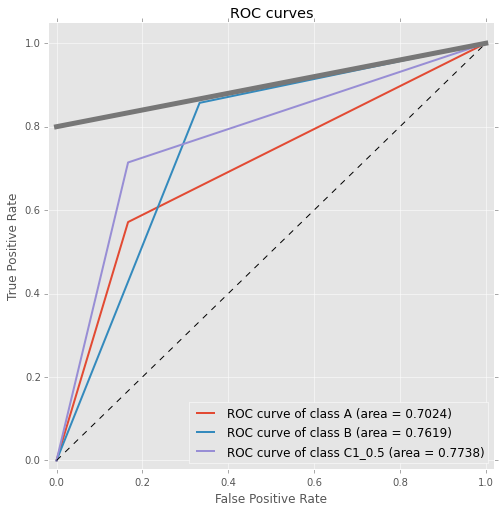

In [7]:
plt.style.use('ggplot')
names = ['A','B','C1_0.5', 'C2_0.3', 'C3_0.6']
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(names[i], roc_auc[i]), linewidth=2.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plot_margin = 0.02
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + 0))
x = np.linspace(0, 1, 3)
y = 0.2 * (x) + 0.80 # line with 0.2 slope
plt.plot(x, y, linewidth=5.0)
plt.show()

### 2.1.3 Draw the convex hull of the classifiers A, B, C. Which classifiers are never optimal? Which classifiers are optimal in a certain environment?

Use scipy.spatial as the convex hull algorithm. Load all points from FPR and TPR

In [8]:
# #convexHull
points = np.vstack((fpr[0], tpr[0])).T
for i in range(n_classes): # the first 3 classifiers
    points = np.append(points, np.vstack((fpr[i], tpr[i])).T, axis=0)
hull = ConvexHull(points)

Plot the __convex hull __

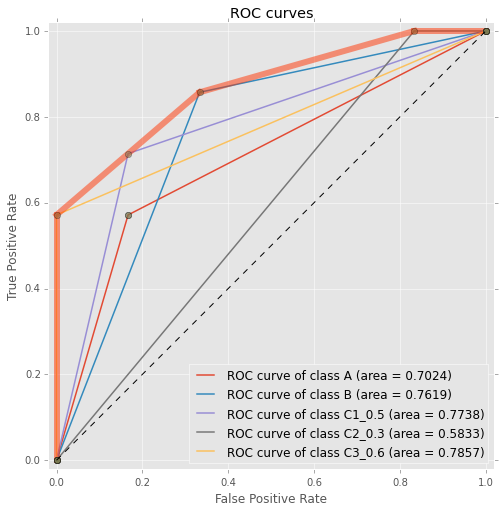

In [9]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.style.use('ggplot')
#Add the 3 roc curves
names = ['A','B','C1_0.5','C2_0.3','C3_0.6']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(names[i], roc_auc[i]), linewidth=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")

# Draw line path of convex hull, skipping the first path "diagonal"
iterpoint = iter(hull.simplices)
next(iterpoint)
for simplex in iterpoint:
    plt.plot(points[simplex, 0], points[simplex, 1], '#ff3300', lw=6, alpha=0.5)
    
# dots
plt.plot(points[:,0], points[:,1], 'o', color = '#7a7a52', alpha=0.5)
#middle line
plt.plot([0, 1], [0, 1], 'k--')
#margins
plot_margin = 0.02
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))
plt.show()

Classifiers under the convex hulll are sub-optimal, in our case A never touches the convex hull. Classifiers on the convex hull obtain the best accuracy for some class distributions. Our class distribution consist of + and -. The ratio -/+ tells us the slope for iso-accuracy lines. 

Let $y = mx + b$ be the equation defining our iso-accuracy line, we have $m = neg / pos$ and the family of iso-accuracy lines is given by changing b. Notice that, higher lines are more desirable.

To sum up, which classifiers are optimal in a certain environment? Depends on the ratio of the corresponding classes, we can think it as the range of + and -. Lets give an example for a specific environment where our ratio is 1 (we have the same quantity of pos and neg).

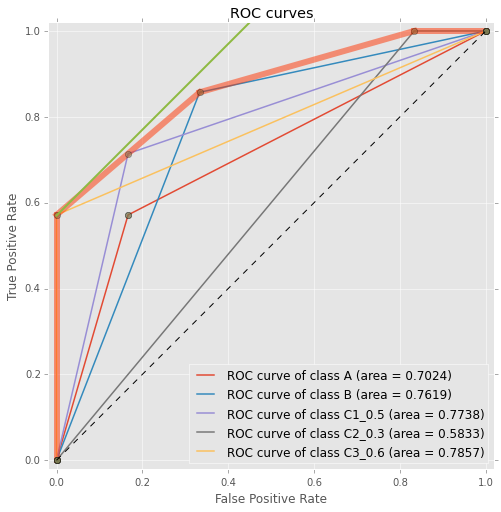

In [10]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.style.use('ggplot')
#Add the 3 roc curves
names = ['A','B','C1_0.5','C2_0.3','C3_0.6']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(names[i], roc_auc[i]), linewidth=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")

# Draw line path of convex hull, skipping the first path "diagonal"
iterpoint = iter(hull.simplices)
next(iterpoint)
for simplex in iterpoint:
    plt.plot(points[simplex, 0], points[simplex, 1], '#ff3300', lw=6, alpha=0.5)
    
# dots
plt.plot(points[:,0], points[:,1], 'o', color = '#7a7a52', alpha=0.5)
#middle line
plt.plot([0, 1], [0, 1], 'k--')

#Iso-accuracy line
x = np.linspace(0, 1, 3)
y = 1. * (x) + 0.57 # line with 0.2 slope
plt.plot(x, y, linewidth=2.0)

#margins
plot_margin = 0.02
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))
plt.show()

As we see, the line in green with $y = m*x + 0.57$ where $m = neg / pos = 1$ the first one to touch the line is classifier C with a threshold of 0.6. Therefore, under this enviornment you should choose C3.

<h2 style="color: #0066cc"> 2.2 Exercise 2: Model selection </div>

### Generate a 2-dimensional dataset with 1000 examples.

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000,centers=4, n_features=2, random_state=0)

__Note__: we used 4 centers

Below you can see a scatter plot of all the points

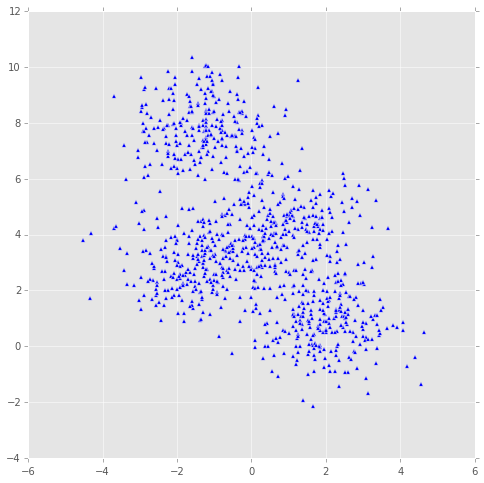

In [12]:
plt.scatter(X[:, 0], X[:, 1], marker='^')
plt.show()

 ### 2.2.1 Use 10-fold crossvalidation and plot k against the misclassification rate. Which value of k should you pick?

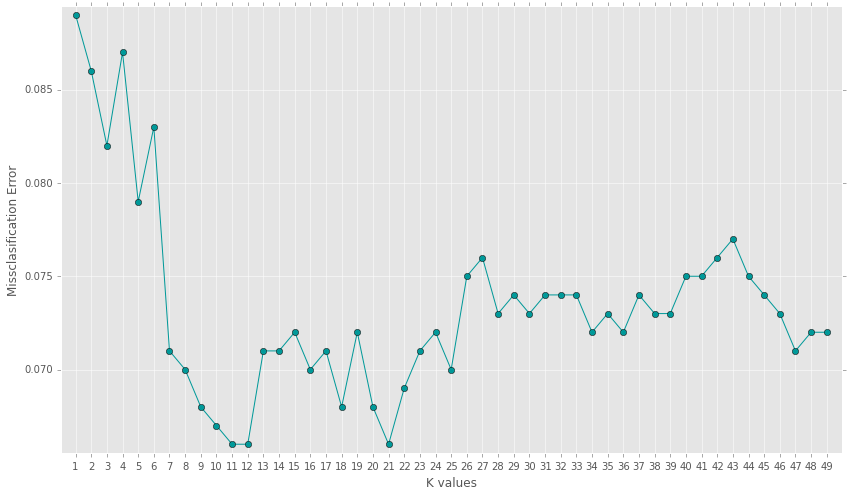

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn import cross_validation
n_samples = len(X)
kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=0)
error_total = np.zeros([49, 1], dtype=float)
for k in range(1,50):
    error = []
    clf = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
    error_total[k-1, 0] = np.array(error).mean()
    
#Plot    
plt.rcParams["figure.figsize"] = (14, 8)
x = np.arange(1,50, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('K values')
plt.ylabel('Missclasification Error')
plt.show()

As we see in the graph, the missclassification is low when we set k = 11. K=11 has 0.066, K=12 has 0.071 and k=21 has 0.069 

### 2.2.2 Do the same but with 100 bootstrapping repeats. What does the bias-variance trade-o look like for low and high values of k?

We randomly draw with ShuffleSplit and use the same cross validation iterator to do the 100 bootstrapping repeats.

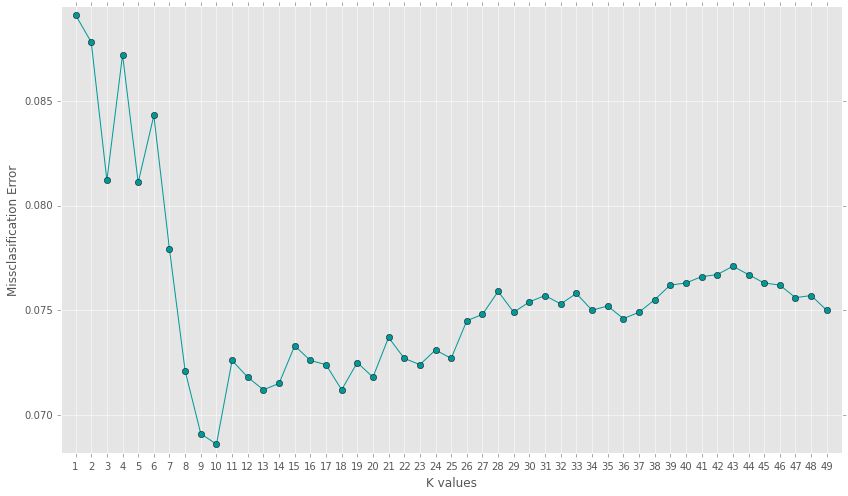

In [14]:
n_samples = len(X)
kf = cross_validation.ShuffleSplit(n_samples,n_iter=100, test_size=0.1, train_size=0.9, random_state=0)
error_total = np.zeros([49, 1], dtype=float)
for k in range(1,50):
    error = []
    clf = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
        # error.append( 1. - clf.score(X_test, y_test) ) #, accuracy_score(y_test, clf.predict(X_test))
    error_total[k-1, 0] = np.array(error).mean()

#Plot    
plt.rcParams["figure.figsize"] = (14, 8)
x = np.arange(1,50, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
# plt.errorbar(x, accuracy_lst[:, 0], accuracy_lst[:, 1], linestyle='None', marker='^')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('K values')
plt.ylabel('Missclasification Error')
plt.show()

Smalles missclassification error is k=10


Lets go to the definition of __bias__: "the error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict." Additionally, we also want to square it so they don't cancel each other. 

We plot the __bias__ as follows:

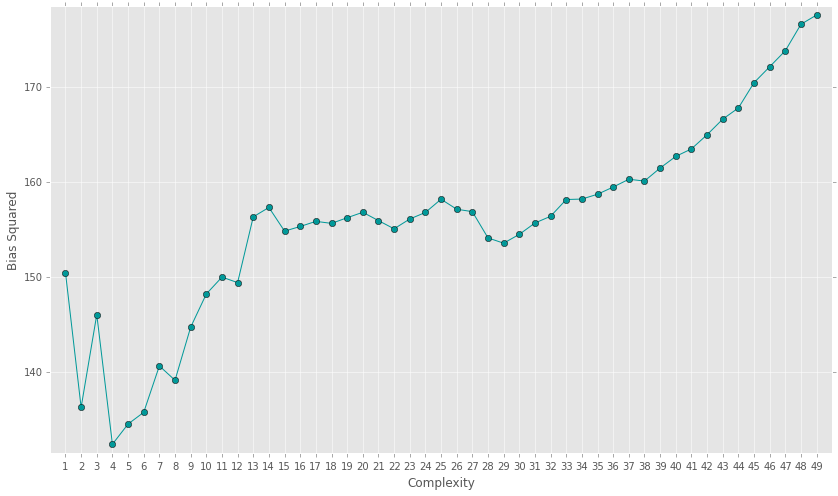

In [131]:
X, y = make_blobs(n_samples=1000,centers=50, n_features=2, random_state=0)
n_samples = len(X)
# kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=0)
kf = cross_validation.ShuffleSplit(1000,n_iter=100, test_size=0.1, train_size=0.9, random_state=0)

error_total = np.zeros([49, 1], dtype=float)
for k in range(1,50):
    error = []
    clf = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        predicted_elements = clf.predict(X_test)

        for i in range(0, len(y_test)):
            error.append( (y_test[i] - predicted_elements[i])*(y_test[i] - predicted_elements[i]) )
        # error.append( y_test[2] )
        # error.append( 1. - clf.score(X_test, y_test) ) #, accuracy_score(y_test, clf.predict(X_test))
    error_total[k-1, 0] = np.array(error).mean() 
x = np.arange(1,50, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
# plt.errorbar(x, accuracy_lst[:, 0], accuracy_lst[:, 1], linestyle='None', marker='^')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('Complexity')
plt.ylabel('Bias Squared')
plt.show()

The definition of variance: "The error due to __variance__ is taken as the variability of a model prediction for a given data point". For a single point how much variation we have.

Below, we plot the variance for a given point:

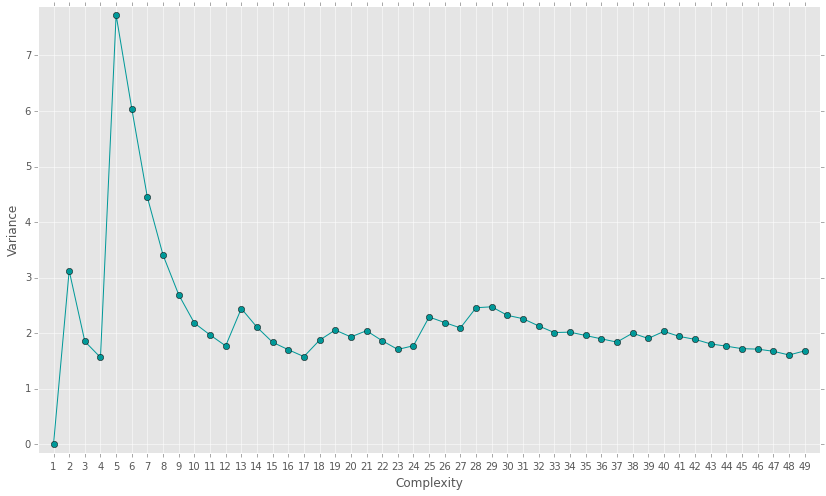

In [133]:
X, y = make_blobs(n_samples=1000,centers=50, n_features=2, random_state=0)
n_samples = len(X)
# kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=0)
kf = cross_validation.ShuffleSplit(1000,n_iter=100, test_size=0.1, train_size=0.9, random_state=0)

error_total = np.zeros([49, 1], dtype=float)
for k in range(1,50):
    error = []
    clf = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)

        res = clf.kneighbors(X_test)
        # print res
        k_candidates =  y_train[res[1]]
        
        total = 0.
        
        total = total + np.array(k_candidates[0]).var()
            
        error.append(total)


        # error.append( y_test[2] )
        # error.append( 1. - clf.score(X_test, y_test) ) #, accuracy_score(y_test, clf.predict(X_test))
    error_total[k-1, 0] = error[0] / k
x = np.arange(1,50, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
# plt.errorbar(x, accuracy_lst[:, 0], accuracy_lst[:, 1], linestyle='None', marker='^')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('Complexity')
plt.ylabel('Variance')
plt.show()

In conclusion, we can see that increasing k is going to decrease the variance while increasing the bias. This means that if we allow more k to enter the variability becomes smaller, but at the cost of higher bias.

### 2.2.3 What if you generate a dataset with 10000 examples, is the result still the same?

Create sample space of 10,000

In [16]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn import cross_validation
X, y = make_blobs(n_samples=1000,centers=4, n_features=2, random_state=0)

10-fold crossvalidation and plot k against the misclassification rate.

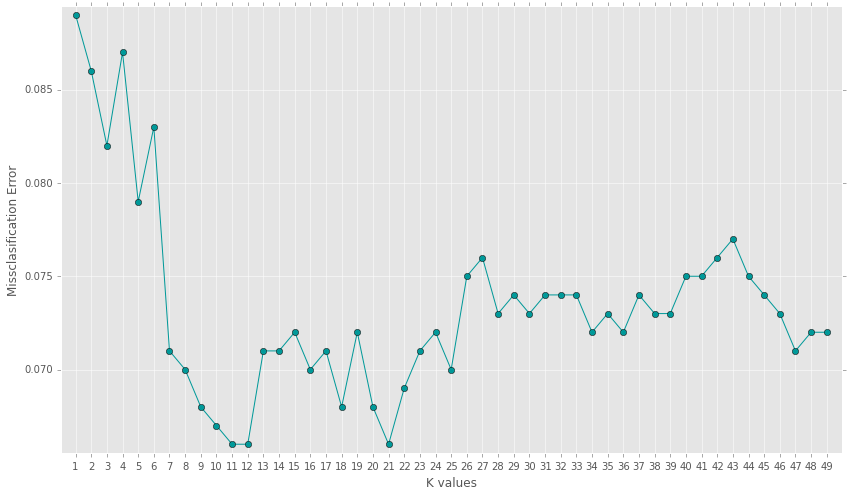

In [17]:
n_samples = len(X)
kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=0)
error_total = np.zeros([49, 1], dtype=float)
for k in range(1,50):
    error = []
    clf = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
    error_total[k-1, 0] = np.array(error).mean()
plt.rcParams["figure.figsize"] = (14, 8)
x = np.arange(1,50, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('K values')
plt.ylabel('Missclasification Error')
plt.show()

With 100 bootstrapping repeats.

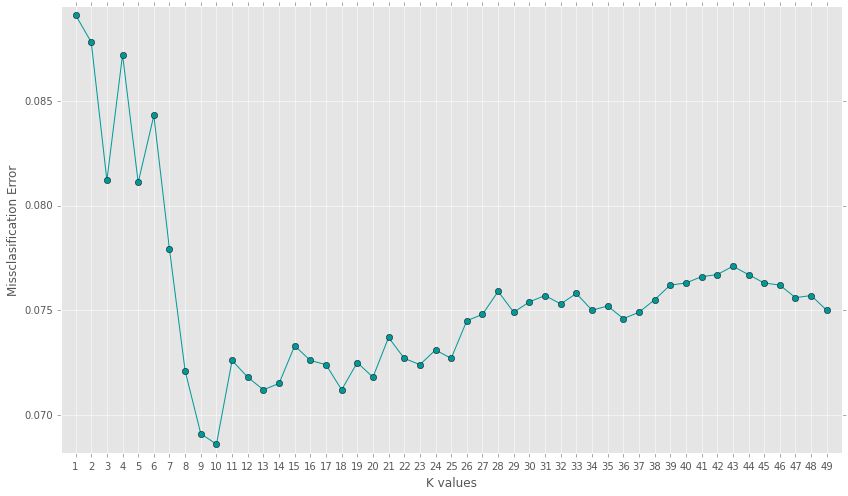

In [18]:
n_samples = len(X)
kf = cross_validation.ShuffleSplit(n_samples,n_iter=100, test_size=0.1, train_size=0.9, random_state=0)
error_total = np.zeros([49, 1], dtype=float)
for k in range(1,50):
    error = []
    clf = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
        # error.append( 1. - clf.score(X_test, y_test) ) #, accuracy_score(y_test, clf.predict(X_test))
    error_total[k-1, 0] = np.array(error).mean()
plt.rcParams["figure.figsize"] = (14, 8)
x = np.arange(1,50, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
# plt.errorbar(x, accuracy_lst[:, 0], accuracy_lst[:, 1], linestyle='None', marker='^')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('K values')
plt.ylabel('Missclasification Error')
plt.show()

In conclusion, from comparing visually both graphs they look the same; there is no remarkable difference.

### 2.2.4 Repeat step 1-3, this time optimizing the hyperparameters of a decision tree. Choose the hyperparameter(s) that you think have the largest impact and use sensible value ranges.

We optimize for the depth of the decision tree

For n = 1000

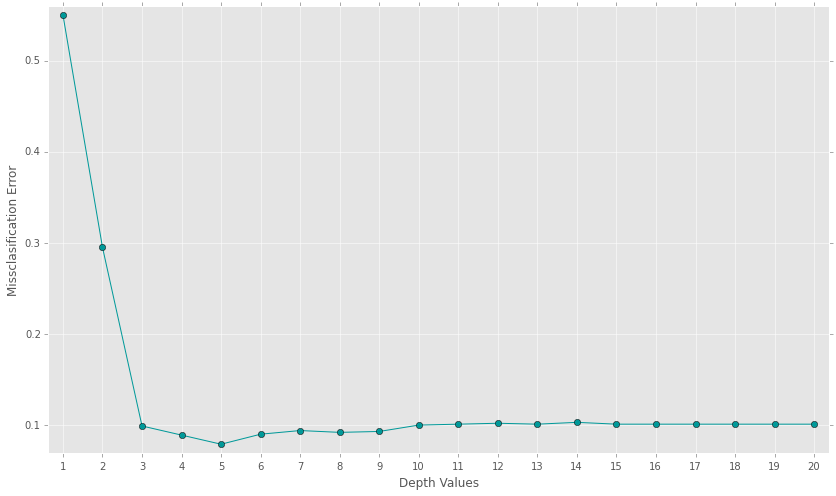

In [145]:
X, y = make_blobs(n_samples=1000,centers=4, n_features=2, random_state=0)
n_samples = len(X)
kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=0)
# kf = cross_validation.ShuffleSplit(1000,n_iter=100, test_size=0.1, train_size=0.9, random_state=0)

error_total = np.zeros([20, 1], dtype=float)
for k in range(1,21):
    error = []
    clf = DecisionTreeClassifier(random_state=0, max_depth=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
        # error.append( 1. - clf.score(X_test, y_test) ) #, accuracy_score(y_test, clf.predict(X_test))
    error_total[k-1, 0] = np.array(error).mean()
    

x = np.arange(1, 21, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
# plt.errorbar(x, accuracy_lst[:, 0], accuracy_lst[:, 1], linestyle='None', marker='^')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('Depth Values')
plt.ylabel('Missclasification Error')
plt.show()

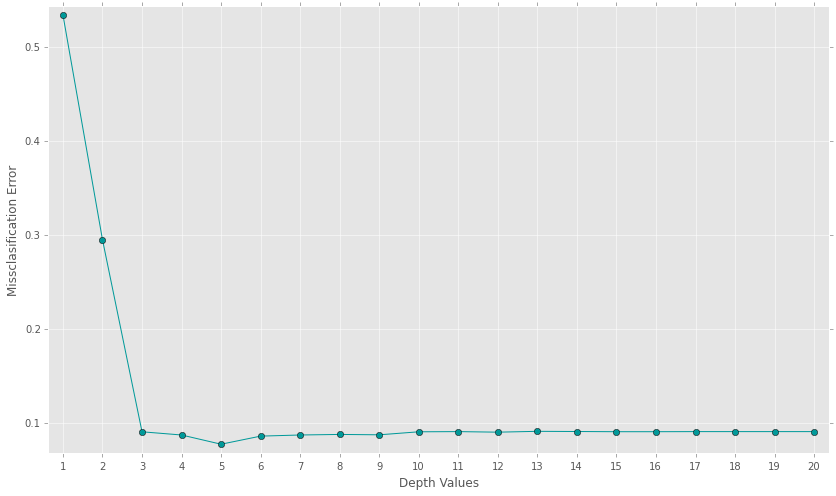

In [146]:
X, y = make_blobs(n_samples=1000,centers=4, n_features=2, random_state=0)
n_samples = len(X)
# kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=0)
kf = cross_validation.ShuffleSplit(1000,n_iter=100, test_size=0.1, train_size=0.9, random_state=0)

error_total = np.zeros([20, 1], dtype=float)
for k in range(1,21):
    error = []
    clf = DecisionTreeClassifier(random_state=0, max_depth=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
        # error.append( 1. - clf.score(X_test, y_test) ) #, accuracy_score(y_test, clf.predict(X_test))
    error_total[k-1, 0] = np.array(error).mean()
    

x = np.arange(1, 21, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
# plt.errorbar(x, accuracy_lst[:, 0], accuracy_lst[:, 1], linestyle='None', marker='^')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('Depth Values')
plt.ylabel('Missclasification Error')
plt.show()

For n = 10000

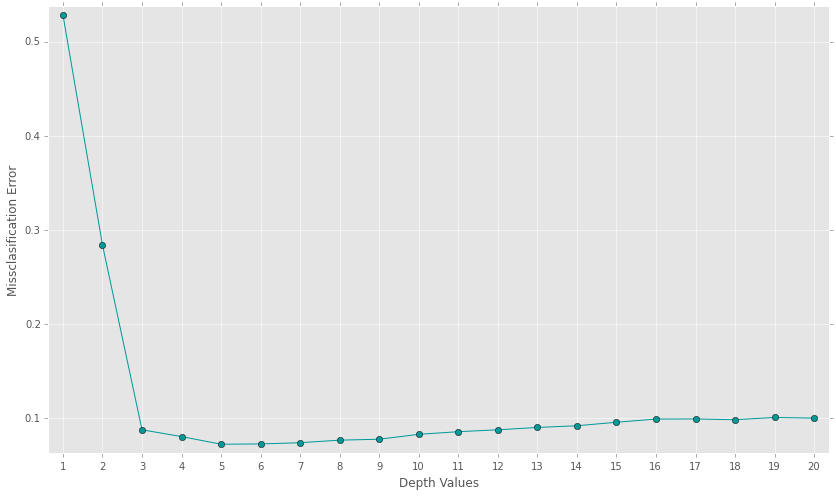

In [147]:
X, y = make_blobs(n_samples=10000,centers=4, n_features=2, random_state=0)
n_samples = len(X)
kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=0)
# kf = cross_validation.ShuffleSplit(1000,n_iter=100, test_size=0.1, train_size=0.9, random_state=0)

error_total = np.zeros([20, 1], dtype=float)
for k in range(1,21):
    error = []
    clf = DecisionTreeClassifier(random_state=0, max_depth=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
        # error.append( 1. - clf.score(X_test, y_test) ) #, accuracy_score(y_test, clf.predict(X_test))
    error_total[k-1, 0] = np.array(error).mean()
    

x = np.arange(1, 21, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
# plt.errorbar(x, accuracy_lst[:, 0], accuracy_lst[:, 1], linestyle='None', marker='^')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('Depth Values')
plt.ylabel('Missclasification Error')
plt.show()

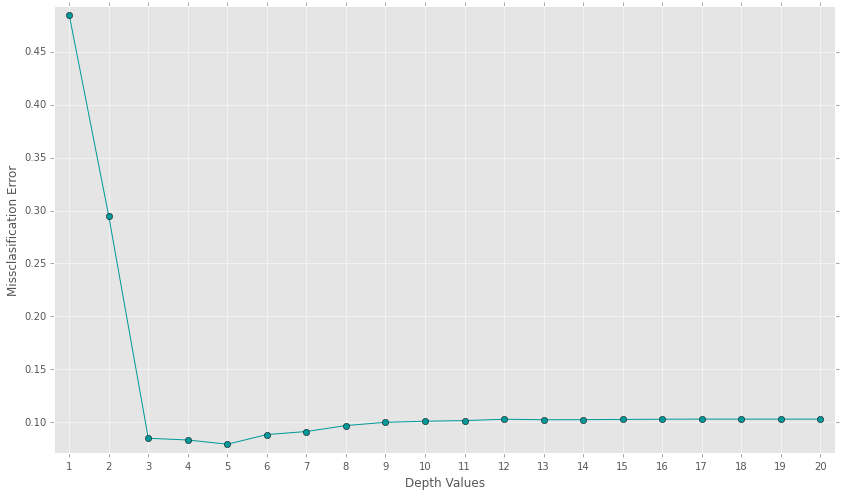

In [148]:
X, y = make_blobs(n_samples=10000,centers=4, n_features=2, random_state=0)
n_samples = len(X)
# kf = cross_validation.KFold(n_samples, n_folds=10, shuffle=False, random_state=0)
kf = cross_validation.ShuffleSplit(1000,n_iter=100, test_size=0.1, train_size=0.9, random_state=0)

error_total = np.zeros([20, 1], dtype=float)
for k in range(1,21):
    error = []
    clf = DecisionTreeClassifier(random_state=0, max_depth=k)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        error.append( zero_one_loss(y_test, clf.predict(X_test)) )
        # error.append( 1. - clf.score(X_test, y_test) ) #, accuracy_score(y_test, clf.predict(X_test))
    error_total[k-1, 0] = np.array(error).mean()
    

x = np.arange(1, 21, dtype=int)
plt.style.use('ggplot')
plt.plot(x, error_total[:, 0], '#009999', marker='o')
# plt.errorbar(x, accuracy_lst[:, 0], accuracy_lst[:, 1], linestyle='None', marker='^')
plt.xticks(x, x)
plt.margins(0.02)
plt.xlabel('Depth Values')
plt.ylabel('Missclasification Error')
plt.show()

As we see the max depth should be 5.

<h2 style="color: #0066cc"> 2.3 Exercise 3: Optimization </h2>

### Import the PenDigits dataset from OpenML (http://www.openml.org/d/32) into R or Python, and then create a separate test set with 20% of the instances using random stratifed sampling.

In [26]:
# imports
from openml.apiconnector import APIConnector
import pandas as pd
import os
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from scipy import spatial

apikey = 'fbc6d4b7868ce52640f6ec74cf076f48'
connector = APIConnector(apikey=apikey)

#loading data
dataset = connector.download_dataset(32)
X, y, attribute_names = dataset.get_dataset(target=dataset.default_target_attribute, return_attribute_names=True)
iris = pd.DataFrame(X, columns=attribute_names)

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, train_size=0.8)

### Optimize the main hyperparameters (at least 2) of a decision tree learner (or SVMs) with a random search. Use nested resampling on the training set to obtain a clean evaluation. Evaluate your optimized hyperparameter settings on the separate test set.

Here, we optimize 2 hyperparameters: min_samples_leaf and max_depth. We define a range of [1,10] for each of the chosen hyper -parameters.

In [28]:
# Decision tree obj.
clf = DecisionTreeClassifier()

#define range for min samples
minsamples = range(1,11)

# define range of the depths.
depth = range(1,11)

# create dictionary with parameter lists.
param_dist = dict(max_depth=depth, min_samples_leaf=minsamples)

Random search CV is used to identify the optimal set of parameters.

In [29]:
# random search cv with clf and parameter grid
rand = RandomizedSearchCV(clf, param_dist, cv= 10, scoring = "accuracy", n_iter=10, random_state= 5)

# fit the model.
rand.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          scoring='accuracy', verbose=0)

The best set of parameters are identified.

In [30]:
# print results.
rand.grid_scores_
rand_mean_scores =[result.mean_validation_score for result in rand.grid_scores_]
print "Best score:"
print rand.best_score_
print "Best set of parameters:"
print rand.best_params_

Best score:
0.95121119072
Best set of parameters:
{'max_depth': 9, 'min_samples_leaf': 1}


Decision tree using the optimized paramters is evaluated on the separate test set. We then calculate the similarity between the actual labels and predicted labels. 

In [31]:
maxdep = rand.best_params_['max_depth']
leaves = rand.best_params_['min_samples_leaf']

# Use best parameters to evaluate
clf1 = DecisionTreeClassifier(max_depth=maxdep, min_samples_leaf=leaves)
clf1.fit(X_train,y_train)
P = clf1.predict(X_test)
sim = result = 1 - spatial.distance.cosine(P, y_test)
print "Similarity between lists of actual and predicted classes: "    
print sim*100

Similarity between lists of actual and predicted classes: 
98.2387194679


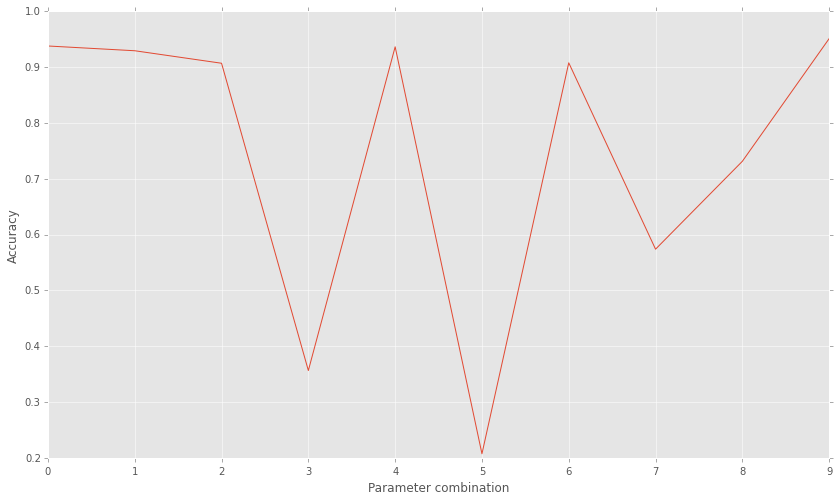

In [32]:
# plot
plt.style.use('ggplot')
plt.plot(rand_mean_scores)
plt.xlabel('Parameter combination')
plt.ylabel('Accuracy')
plt.show()

#### Do the same, but this time don't use nested resampling: just optimize the hyperparameter settings on the training data. Do you get diferent optimized parameters? Also evaluate these on your separate test set. Which approach yields the best results? Explain your findings.
#### Optimize these hyperparameters again (using nested resampling), but replace random search with a more intelligent approach, e.g. iterated F-racing. Plot the number of evaluations against the perfor- mance of the best hyperparameters up till then, for both approaches. Which approach finds good hyperparameter settings faster? 


For the next 2 sections, we use Grid search cv (instead of iterated f-racing) to optimize the hyper-parameters.

In [33]:
# use grid search
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_dist, cv=10, scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [34]:
grid.grid_scores_
grid_mean_scores =[result.mean_validation_score for result in grid.grid_scores_]
# print best results and parameters
print "Best Score:"
print grid.best_score_
print "Best set of parameters:"
print grid.best_params_

Best Score:
0.956897532128
Best set of parameters:
{'max_depth': 10, 'min_samples_leaf': 1}


In [35]:
maxdep = grid.best_params_['max_depth']
leaves = grid.best_params_['min_samples_leaf']

# Use best parameters
clf1 = DecisionTreeClassifier(max_depth=maxdep, min_samples_leaf=leaves)
clf1.fit(X_train,y_train)
P = clf1.predict(X_test)
sim = result = 1 - spatial.distance.cosine(P, y_test)
print "Similarity between actual and predicted classes: "    
print sim*100

Similarity between actual and predicted classes: 
98.4076007556


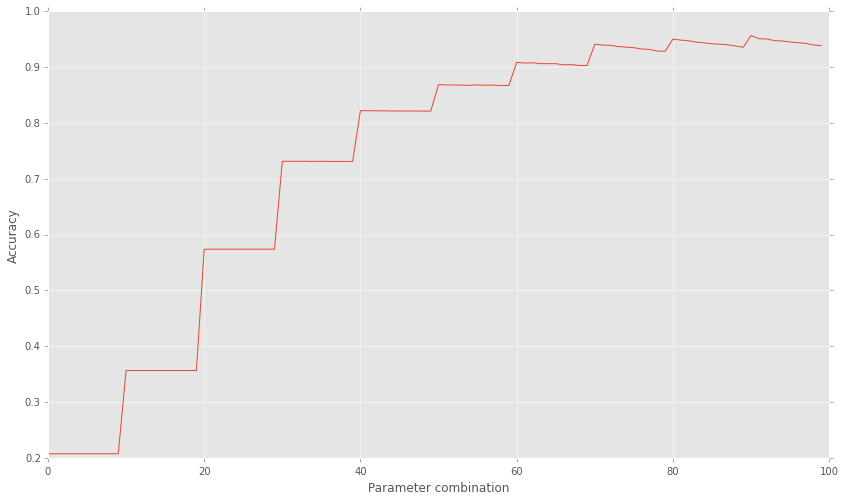

In [36]:
# plot
plt.style.use('ggplot')
plt.plot(grid_mean_scores)
plt.xlabel('Parameter combination')
plt.ylabel('Accuracy')
plt.show()

In general, grid search CV performs better than random search CV. Grid search CV, though slower than random search cv, 
has better accuracy and hence a lower misclassification rate. 

Random search CV doesn't search every combination of paramters, and hence is considerably faster in finding a suitable set of parameters. These parameters are almost as good as those returned by grid search CV and hence, random search CV is a good substitute for grid search CV. 